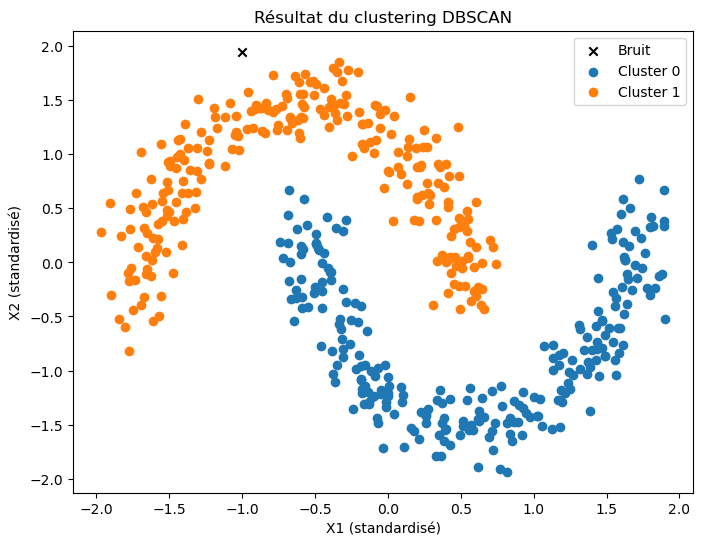

In [1]:
# =========================
# Import des bibliothèques
# =========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# =========================
# Génération des données
# =========================
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)

# =========================
# Mise à l'échelle
# =========================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# =========================
# Application de DBSCAN
# =========================
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X_scaled)
labels = dbscan.labels_

# =========================
# Visualisation des clusters
# =========================
plt.figure(figsize=(8, 6))

# Points bruités (label = -1)
mask_noise = labels == -1
plt.scatter(X_scaled[mask_noise, 0], X_scaled[mask_noise, 1], 
            c='black', marker='x', label='Bruit')

# Clusters
for cluster_id in set(labels):
    if cluster_id == -1:
        continue
    mask = labels == cluster_id
    plt.scatter(X_scaled[mask, 0], X_scaled[mask, 1], 
                label=f'Cluster {cluster_id}')

plt.title("Résultat du clustering DBSCAN")
plt.xlabel("X1 (standardisé)")
plt.ylabel("X2 (standardisé)")
plt.legend()
plt.show()
